# Terminal commands to do first
## Create virtual environment, erp
py -3.9 venv c:\.venv\erp
## Activate
cd C:\projects\python\eegprog\EEG-Project\attachment\
C:\.venv\erp\Scripts\Activate.ps1
## Install packages etc
pip install --upgrade pip
pip install wheel
pip install ipykernel
python -m ipykernel install --user --name erp --display-name "Python (erp)"
pip install -r requirements.txt

There are some problems occuring that might indicate that a newer
version of Python was used. On request A. Aziz provided information
that Python 3.9 was used as has been used in the current notebook.  In
the repository, a requirements.txt and requirements2.txt was provided
and.  There are discrepancies between version numbers in the the
environment created according to instructions and the version numbers
found in the requirements.txt files.

      current version                 requirements.txt
- scikit-learn==1.4.2              NA
- scikit-learn-intelex==2024.3.0   scikit-learn-intelex==2021.20220215.102710*
- tensorflow==2.16.1               tensorflow==2.11.0
- keras==3.3.2                     keras==2.11.0
  
* On the attempt to install, the folling error occured: 
ERROR: Ignored the following versions that require a different python
version: 2021.6.0 Requires-Python ==3.10.*

The last error message might indicate that Python 3.10 should be used
rather than 3.9.



In [135]:
# The following is not required and is kept for history 
# The original package installation (A. Azis).    
if False:    
    !pip install glob2 
    !pip install mne
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install seaborn
    !pip install scikit-learn
    !pip install h5py
    !pip install keras
    !pip install tensorflow
    !pip install os-sys
    !pip install PyWavelets
    !pip install scikit-image
    !pip install pytest-warnings
# Some packages missing from original
elif False:
    !pip install python-picard
    
# If you want to check the package installation
elif True:
    !pip freeze

absl-py==2.1.0
asttokens==2.4.1
astunparse==1.6.3
cachetools==5.3.3
certifi==2024.2.2
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.2
contourpy==1.2.1
cycler==0.12.1
daal==2024.3.0
daal4py==2024.3.0
debugpy==1.8.1
decorator==5.1.1
discid==1.2.0
exceptiongroup==1.2.1
executing==2.0.1
fasteners==0.19
flatbuffers==24.3.25
fonttools==4.51.0
gast==0.4.0
glob2==0.7
google-auth==2.29.0
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
grpcio==1.62.2
h5py==3.11.0
idna==3.7
imageio==2.34.1
importlib_metadata==7.1.0
importlib_resources==6.4.0
iniconfig==2.0.0
ipykernel==6.29.4
ipython==8.18.1
jedi==0.19.1
Jinja2==3.1.3
joblib==1.4.0
jupyter_client==8.6.1
jupyter_core==5.7.2
keras==2.11.0
kiwisolver==1.4.5
lazy_loader==0.4
libclang==18.1.1
Markdown==3.6
markdown-it-py==3.0.0
MarkupSafe==2.1.5
matplotlib==3.8.4
matplotlib-inline==0.1.7
mdurl==0.1.2
ml-dtypes==0.3.2
mne==1.7.0
mutagen==1.47.0
namex==0.0.8
nest-asyncio==1.6.0
networkx==3.2.1
numexpr==2.10.0
numpy==1.26.4
oauthlib==3.2.2
opt-eins

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.version

'3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]'

# Importing modules
The following commands should execute with no output

In [136]:
import glob
import mne
from mne.preprocessing import ICA, EOGRegression
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [137]:
from preprocessing import preprocessing, readEpochDenoise
from patient_data import patient_data
from Hjorths import hjorths, getFeaturesIntoDataframe
from ML import ML, get_ML_Results, highlight_max_clr, highlight_max_acc, plotCM
from DL import EEGNet

## Pre-processing
### Splitting the features of Raw EEG data and assigning them to their correct subject group.

In [6]:
data_path = glob.glob('Raw/*.set')
DLB      = [i for i in data_path if 'DLB' in i.split('\\')[1]]
AD     = [i for i in data_path if 'F001' in i.split('\\')[1]]
PDD     = [i for i in data_path if 'F023' in i.split('\\')[1]]
PD      = [i for i in data_path if 'G20' in i.split('\\')[1]]
HC = [i for i in data_path if 'Kontroll' in i.split('\\')[1]]

print(len(DLB), len(AD), len(PDD), len(PD), len(HC))

16 19 13 15 21


### In this section the RAW EEG data for each subject group have been read, pre-processed and saved into a file.

In [7]:
# read, clean, and epoch all the data
cleaned_data = readEpochDenoise(DLB, AD, PDD, PD, HC,  apply_wavelet = False, apply_notch = False)

Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.9s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


695 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 695 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['T8']


1 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.6s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


727 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 727 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 4.2s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 3 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


773 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 773 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.6s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


705 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 705 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.2s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 4 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


717 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 717 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 5.8s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


711 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 711 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['Fp1']


1 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.4s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


696 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 696 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 5.0s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


673 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 673 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.6s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 4 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


703 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 703 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.4s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 3 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


709 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 709 events and 481 original time points ...


1 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 5.3s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 1 ICA component


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


707 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 707 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'Fp1']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'Fp1']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'Fp1']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'Fp1']


9 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 5.9s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


709 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 709 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.8s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 3 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


1022 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 1022 events and 481 original time points ...


1 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


4 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 4.8s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


685 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 685 events and 481 original time points ...


1 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['T8']


1 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.0s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


519 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 519 events and 481 original time points ...


1 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 4.3s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 3 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


669 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 669 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 9.6s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 1 ICA component


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


701 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 701 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['Fp2']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['Fp2']


    Rejecting  epoch based on EEG : ['Fp2']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['Fp2']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['Fp2']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['Fp2']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


    Rejecting  epoch based on EEG : ['T7']


61 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 5.0s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 0 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


709 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 709 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T7', 'T8', 'Fp1', 'Fp2', 'F3', 'F4']


    Rejecting  epoch based on EEG : ['T8', 'Fp1', 'Fp2', 'F3']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F4']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F3', 'F4']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['T8', 'F4']


    Rejecting  epoch based on EEG : ['T8', 'F4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T7', 'T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F4']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F3', 'F4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T7', 'T8', 'C4']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'Fp1', 'Fp2', 'F3', 'F4']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'F3', 'F4']


    Rejecting  epoch based on EEG : ['T8', 'F3', 'F4']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8', 'C4']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F4']


    Rejecting  epoch based on EEG : ['T7', 'T8', 'Fp1', 'Fp2', 'F3', 'F4']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T7', 'T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


207 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.0s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 4 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


706 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 706 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.2s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 1 ICA component


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


697 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 697 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


161 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 4.2s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 1 ICA component


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


733 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 733 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


    Rejecting  epoch based on EEG : ['T8']


24 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 2.7s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


702 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 702 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 6.3s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 2 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


663 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 663 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


0 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 2.7s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 3 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


725 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 725 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['T8', 'Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']


    Rejecting  epoch based on EEG : ['Fp1']


    Rejecting  epoch based on EEG : ['Fp1']


18 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


Fitting ICA took 3.5s.


Using EOG channel: V-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Using EOG channel: H-EOG


... filtering ICA sources


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


... filtering target


Setting up band-pass filter from 0.5 - 60 Hz


FIR filter parameters


---------------------


Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:


- Windowed frequency-domain design (firwin2) method


- Hann window


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 60.00 Hz


- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 60.25 Hz)


- Filter length: 3000 samples (10.000 s)


Applying ICA to Raw instance


    Transforming to ICA space (13 components)


    Zeroing out 3 ICA components


    Projecting back using 14 PCA components


Used Annotations descriptions: ['1', '10', '2', '3']


Not setting metadata


709 matching events found


No baseline correction applied


0 projection items activated


Using data from preloaded Raw for 709 events and 481 original time points ...


0 bad epochs dropped


Applying baseline correction (mode: mean)


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['O1']


    Rejecting  epoch based on EEG : ['Fp2']


3 bad epochs dropped


Filtering raw data in 1 contiguous segment


Setting up band-pass filter from 0.5 - 50 Hz


FIR filter parameters


---------------------


Designing a one-pass, zero-phase, non-causal bandpass filter:


- Windowed time-domain design (firwin) method


- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation


- Lower passband edge: 0.50


- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)


- Upper passband edge: 50.00 Hz


- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)


- Filter length: 1981 samples (6.603 s)


EEG channel type selected for re-referencing


Applying average reference.


Applying a custom ('EEG',) reference.


No projector specified for this dataset. Please consider the method self.add_proj.


No projector specified for this dataset. Please consider the method self.add_proj.


Fitting ICA to data using 14 channels (please be patient, this may take a while)


Selecting by non-zero PCA components: 13 components


KeyboardInterrupt: 

Due to problems saving to numpy due to sequence problems due to
inhomegeneous data, data was stored to pickle instead.  Change for
this was made in preprocessing.py.  In the notebook, the function
pkl_load was made for loading.

In [50]:
# save the data belonging to the standard stimuli into a file with the same name
cleaned_data.save_data(standard = True , target = False, distractor = False, 
                     reaction_time = False, all_stimuli = False)

In [51]:
# save the data belonging to the target stimuli into file with the same name
cleaned_data.save_data(standard = False , target = True, distractor = False, 
                     reaction_time = False, all_stimuli = False)

In [52]:
# save the data belonging to the distractor stimuli into file with the same name
cleaned_data.save_data(standard = False , target = False, distractor = True, 
                     reaction_time = False, all_stimuli = False)

In [53]:
# save the data belonging to the reaction_time into file with the same name
cleaned_data.save_data(standard = False, target = False, distractor = False, 
                     reaction_time = True, all_stimuli = False)

In [54]:
# save the data belonging to the all stimuli into file with the same name
cleaned_data.save_data(standard = False , target = False, distractor = False, 
                     reaction_time = False, all_stimuli = True)

## Load preprocessed data

In [ ]:
groups = ['DLB', 'AD', 'PDD', 'PD', 'HC']
events = ['Standard', 'Target', 'Distractor', ]

In [73]:
def pkl_load(pp_file):
    with open(pp_file, 'rb') as handle:
        v_out = np.array(pickle.load(handle), dtype=object)
    return v_out


In [45]:
ldmode = 'npy'
if ldmode == 'npy':
    ppdir = 'C:/EKG/Codes/'
else:
    ppdir = ''
    
# Standard epochs ica-cleaned

if ldmode == 'npy':
    ppdir = 'C:/EKG/Codes/'
    DLB_Standard_0  = np.load(ppdir+'preprocessed_data/Standard_DLB.npy', allow_pickle=True)
    AD_Standard_0   = np.load(ppdir+'preprocessed_data/Standard_AD.npy', allow_pickle=True)
    PDD_Standard_0  = np.load(ppdir+'preprocessed_data/Standard_PDD.npy', allow_pickle=True)
    PD_Standard_0   = np.load(ppdir+'preprocessed_data/Standard_PD.npy', allow_pickle=True)
    HC_Standard_0   = np.load(ppdir+'preprocessed_data/Standard_HC.npy', allow_pickle=True)
    print(DLB_Standard_0.shape, AD_Standard_0.shape, PDD_Standard_0.shape, 
          PD_Standard_0.shape, HC_Standard_0.shape)
if True:
    ppdir = ''
    DLB_Standard  = pkl_load(ppdir+'preprocessed_data/Standard_DLB.pkl')
    AD_Standard   = pkl_load(ppdir+'preprocessed_data/Standard_AD.pkl')
    PDD_Standard  = pkl_load(ppdir+'preprocessed_data/Standard_PDD.pkl')
    PD_Standard   = pkl_load(ppdir+'preprocessed_data/Standard_PD.pkl')
    HC_Standard   = pkl_load(ppdir+'preprocessed_data/Standard_HC.pkl')
    print(np.array(DLB_Standard).shape , np.array(AD_Standard).shape , np.array(PDD_Standard).shape, np.array(PD_Standard).shape, np.array(HC_Standard).shape)

(16, 300, 9, 205) (19, 300, 9, 205) (13, 300, 9, 205) (15, 300, 9, 205) (21, 300, 9, 205)


(16, 300, 9, 205) (19, 300, 9, 205) (13, 300, 9, 205) (15, 300, 9, 205) (21, 300, 9, 205)


In [81]:
# target epochs 
if True:
    ppdir = 'C:/EKG/Codes/'
    DLB_Target_0  = np.load(ppdir+'preprocessed_data/Target_DLB.npy', allow_pickle=True)
    AD_Target_0   = np.load(ppdir+'preprocessed_data/Target_AD.npy', allow_pickle=True)
    PDD_Target_0  = np.load(ppdir+'preprocessed_data/Target_PDD.npy', allow_pickle=True)
    PD_Target_0   = np.load(ppdir+'preprocessed_data/Target_PD.npy', allow_pickle=True)
    HC_Target_0   = np.load(ppdir+'preprocessed_data/Target_HC.npy', allow_pickle=True)
    print(DLB_Target_0.shape, AD_Target_0.shape, PDD_Target_0.shape, PD_Target_0.shape, HC_Target_0.shape)
if True:
    ppdir = ''
    DLB_Target  = pkl_load(ppdir+'preprocessed_data/Target_DLB.pkl')
    AD_Target   = pkl_load(ppdir+'preprocessed_data/Target_AD.pkl')
    PDD_Target  = pkl_load(ppdir+'preprocessed_data/Target_PDD.pkl')
    PD_Target   = pkl_load(ppdir+'preprocessed_data/Target_PD.pkl')
    HC_Target   = pkl_load(ppdir+'preprocessed_data/Target_HC.pkl')
    print(DLB_Target.shape, AD_Target.shape, PDD_Target.shape, PD_Target.shape, HC_Target.shape)

(16,) (19,) (13,) (15,) (21, 75, 9, 205)
(16,) (19,) (13,) (15,) (21, 75, 9, 205)


In [83]:
# distractor epochs
if True:
    ppdir = 'C:/EKG/Codes/'
    DLB_Distractor_0  = np.load(ppdir+'preprocessed_data/Distractor_DLB.npy', allow_pickle=True)
    AD_Distractor_0   = np.load(ppdir+'preprocessed_data/Distractor_AD.npy', allow_pickle=True)
    PDD_Distractor_0  = np.load(ppdir+'preprocessed_data/Distractor_PDD.npy', allow_pickle=True)
    PD_Distractor_0   = np.load(ppdir+'preprocessed_data/Distractor_PD.npy', allow_pickle=True)
    HC_Distractor_0   = np.load(ppdir+'preprocessed_data/Distractor_HC.npy', allow_pickle=True)
    print(DLB_Distractor_0.shape, AD_Distractor_0.shape, PDD_Distractor_0.shape, PD_Distractor_0.shape, HC_Distractor_0.shape)
if True:
    ppdir = ''
    DLB_Distractor  = pkl_load(ppdir+'preprocessed_data/Distractor_DLB.pkl')
    AD_Distractor   = pkl_load(ppdir+'preprocessed_data/Distractor_AD.pkl')
    PDD_Distractor  = pkl_load(ppdir+'preprocessed_data/Distractor_PDD.pkl')
    PD_Distractor   = pkl_load(ppdir+'preprocessed_data/Distractor_PD.pkl')
    HC_Distractor   = pkl_load(ppdir+'preprocessed_data/Distractor_HC.pkl')
    print(DLB_Distractor.shape, AD_Distractor.shape, PDD_Distractor.shape, PD_Distractor.shape, HC_Distractor.shape)

(16,) (19,) (13,) (15,) (21, 75, 9, 205)
(16,) (19,) (13,) (15,) (21, 75, 9, 205)


In [90]:
print(DLB_Distractor[0][0][0][1])
print(DLB_Distractor_0[0][0][0][1])


-1.4750623544808863e-06
-1.4750623544809003e-06


## Compute Hjorth's parameters

In [91]:
# compute Hjorth's parameters for standard epochs
DLB_HP_Standard = hjorths(DLB_Standard, average = False) # DLB
AD_HP_Standard  = hjorths(AD_Standard, average = False) # AD
PDD_HP_Standard = hjorths(PDD_Standard, average = False) # PD
PD_HP_Standard  = hjorths(PD_Standard, average = False) # PDD
HC_HP_Standard  = hjorths(HC_Standard, average = False) # HC

In [92]:
# compute Hjorth's parameters for target epochs
DLB_HP_Target = hjorths(DLB_Target, average = False) # DLB
AD_HP_Target  = hjorths(AD_Target, average = False) # AD
PDD_HP_Target = hjorths(PDD_Target, average = False) # PD
PD_HP_Target  = hjorths(PD_Target, average = False) # PDD
HC_HP_Target  = hjorths(HC_Target, average = False) # HC

In [93]:
# compute Hjorth's parameters for distractor epochs
DLB_HP_Distractor = hjorths(DLB_Distractor, average = False) # DLB 
AD_HP_Distractor  = hjorths(AD_Distractor, average = False)  # AD
PDD_HP_Distractor = hjorths(PDD_Distractor, average = False) # PD 
PD_HP_Distractor  = hjorths(PD_Distractor, average = False)  # PDD
HC_HP_Distractor  = hjorths(HC_Distractor, average = False) # HC

## Classification results for traditional MACHINE LEARNING CLASSIFIERS

Some changes were made in ML.py, changing max_features for
RandomForestClassifier from 'auto' to 'sqrt' and loss for
GradientBoostingClassification from 'deviance' to 'log_loss'. 

In [104]:
Results = get_ML_Results(DLB_Standard = DLB_HP_Standard, AD_Standard = AD_HP_Standard, 
                         PDD_Standard = PDD_HP_Standard, PD_Standard = PD_HP_Standard, 
                         HC_Standard = HC_HP_Standard,
                         DLB_Target = DLB_HP_Target, AD_Target = AD_HP_Target, 
                         PDD_Target = PDD_HP_Target, PD_Target = PD_HP_Target,
                         HC_Target = HC_HP_Target,
                         DLB_Distractor = DLB_HP_Distractor, AD_Distractor = AD_HP_Distractor,
                         PDD_Distractor = PDD_HP_Distractor, PD_Distractor = PD_HP_Distractor,
                         HC_Distractor =  HC_HP_Distractor)

### Highlighed best performance classifiers based on the f1-score, precision and recall for activity feature of standard stimuli.

In [105]:
results_Standard = highlight_max_clr( Results ,Standard = True, Target = False, Distractor = False)
df_clr_A = results_Standard.mean_std(input_feature = 'Activity')
#df_clr_A.to_latex('clr_A.tex')
df_clr_A

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.922 ( 0.04),0.925 ( 0.06),0.968 ( 0.02),0.915 ( 0.1),0.841 ( 0.14),RF
precision/Random Forest,0.909 ( 0.04),0.932 ( 0.1),0.976 ( 0.03),0.928 ( 0.1),0.836 ( 0.21),RF
recall/Random Forest,0.939 ( 0.08),0.926 ( 0.08),0.961 ( 0.02),0.913 ( 0.14),0.867 ( 0.09),RF
f1-score/Gradient Boosting,0.872 ( 0.09),0.898 ( 0.08),0.938 ( 0.04),0.844 ( 0.09),0.839 ( 0.1),GB
precision/Gradient Boosting,0.853 ( 0.12),0.898 ( 0.06),0.967 ( 0.05),0.871 ( 0.14),0.816 ( 0.18),GB
recall/Gradient Boosting,0.9 ( 0.11),0.9 ( 0.11),0.915 ( 0.07),0.841 ( 0.13),0.896 ( 0.1),GB
f1-score/KNN,0.872 ( 0.06),0.884 ( 0.06),0.933 ( 0.04),0.898 ( 0.07),0.826 ( 0.1),KNN
precision/KNN,0.827 ( 0.08),0.819 ( 0.1),0.982 ( 0.02),0.96 ( 0.05),0.88 ( 0.16),KNN
recall/KNN,0.924 ( 0.06),0.969 ( 0.03),0.89 ( 0.07),0.852 ( 0.12),0.793 ( 0.11),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for mobility feature of standard stimuli.

In [106]:
df_clr_M = results_Standard.mean_std(input_feature = 'Mobility')
#df_clr_M.to_latex('clr_M.tex')
df_clr_M

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.866 ( 0.08),0.867 ( 0.11),0.944 ( 0.02),0.884 ( 0.11),0.803 ( 0.24),RF
precision/Random Forest,0.834 ( 0.12),0.848 ( 0.08),0.961 ( 0.03),0.918 ( 0.04),0.852 ( 0.29),RF
recall/Random Forest,0.917 ( 0.1),0.889 ( 0.15),0.928 ( 0.03),0.867 ( 0.18),0.77 ( 0.21),RF
f1-score/Gradient Boosting,0.87 ( 0.05),0.811 ( 0.14),0.905 ( 0.03),0.853 ( 0.08),0.68 ( 0.39),GB
precision/Gradient Boosting,0.83 ( 0.12),0.8 ( 0.16),0.936 ( 0.04),0.861 ( 0.06),0.769 ( 0.43),GB
recall/Gradient Boosting,0.93 ( 0.06),0.835 ( 0.16),0.879 ( 0.06),0.857 ( 0.15),0.622 ( 0.38),GB
f1-score/KNN,0.867 ( 0.07),0.88 ( 0.1),0.889 ( 0.06),0.868 ( 0.08),0.749 ( 0.34),KNN
precision/KNN,0.805 ( 0.11),0.84 ( 0.11),0.913 ( 0.11),0.944 ( 0.03),0.825 ( 0.32),KNN
recall/KNN,0.95 ( 0.07),0.926 ( 0.09),0.873 ( 0.05),0.813 ( 0.14),0.696 ( 0.34),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for complexity feature of standard stimuli.

In [109]:
df_clr_C = results_Standard.mean_std(input_feature = 'Complexity')
#df_clr_C.to_latex('clr_C.tex')
df_clr_C

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.907 ( 0.02),0.846 ( 0.21),0.958 ( 0.05),0.875 ( 0.12),0.704 ( 0.18),RF
precision/Random Forest,0.894 ( 0.05),0.895 ( 0.07),0.941 ( 0.07),0.88 ( 0.13),0.795 ( 0.3),RF
recall/Random Forest,0.926 ( 0.06),0.856 ( 0.29),0.977 ( 0.02),0.874 ( 0.13),0.719 ( 0.13),RF
f1-score/Gradient Boosting,0.857 ( 0.07),0.882 ( 0.13),0.925 ( 0.06),0.857 ( 0.09),0.686 ( 0.15),GB
precision/Gradient Boosting,0.865 ( 0.09),0.923 ( 0.05),0.92 ( 0.08),0.87 ( 0.05),0.696 ( 0.27),GB
recall/Gradient Boosting,0.854 ( 0.09),0.861 ( 0.2),0.934 ( 0.07),0.852 ( 0.15),0.756 ( 0.08),GB
f1-score/KNN,0.861 ( 0.05),0.768 ( 0.23),0.898 ( 0.07),0.862 ( 0.11),0.587 ( 0.11),KNN
precision/KNN,0.813 ( 0.08),0.693 ( 0.2),0.85 ( 0.1),0.931 ( 0.07),0.923 ( 0.12),KNN
recall/KNN,0.926 ( 0.09),0.867 ( 0.28),0.955 ( 0.03),0.807 ( 0.14),0.444 ( 0.12),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for activity feature of target stimuli.

In [110]:
results_Target = highlight_max_clr( Results ,Standard = False, Target = True, Distractor = False)
clr_A_T = results_Target.mean_std(input_feature = 'Activity')
#clr_A_T.to_latex('clr_A_T.tex')
clr_A_T

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.766 ( 0.13),0.815 ( 0.12),0.94 ( 0.04),0.633 ( 0.17),0.754 ( 0.06),RF
precision/Random Forest,0.745 ( 0.17),0.795 ( 0.14),0.95 ( 0.06),0.668 ( 0.11),0.828 ( 0.14),RF
recall/Random Forest,0.804 ( 0.12),0.844 ( 0.12),0.932 ( 0.05),0.644 ( 0.27),0.704 ( 0.05),RF
f1-score/Gradient Boosting,0.736 ( 0.12),0.803 ( 0.11),0.904 ( 0.04),0.618 ( 0.13),0.746 ( 0.14),GB
precision/Gradient Boosting,0.779 ( 0.18),0.777 ( 0.19),0.899 ( 0.08),0.709 ( 0.03),0.764 ( 0.22),GB
recall/Gradient Boosting,0.741 ( 0.18),0.859 ( 0.11),0.92 ( 0.09),0.574 ( 0.22),0.763 ( 0.08),GB
f1-score/KNN,0.766 ( 0.08),0.827 ( 0.11),0.902 ( 0.05),0.69 ( 0.2),0.606 ( 0.15),KNN
precision/KNN,0.707 ( 0.1),0.798 ( 0.14),0.908 ( 0.09),0.762 ( 0.19),0.716 ( 0.23),KNN
recall/KNN,0.856 ( 0.12),0.863 ( 0.09),0.901 ( 0.03),0.659 ( 0.25),0.533 ( 0.12),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for mobility feature of target stimuli.

In [111]:
clr_M_T = results_Target.mean_std(input_feature = 'Mobility')
#clr_M_T.to_latex('clr_M_T.tex')
clr_M_T

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.761 ( 0.17),0.815 ( 0.08),0.798 ( 0.04),0.751 ( 0.19),0.797 ( 0.14),RF
precision/Random Forest,0.795 ( 0.11),0.816 ( 0.11),0.795 ( 0.11),0.785 ( 0.17),0.805 ( 0.24),RF
recall/Random Forest,0.785 ( 0.26),0.822 ( 0.1),0.812 ( 0.07),0.726 ( 0.22),0.844 ( 0.12),RF
f1-score/Gradient Boosting,0.828 ( 0.11),0.778 ( 0.07),0.779 ( 0.04),0.724 ( 0.09),0.774 ( 0.14),GB
precision/Gradient Boosting,0.87 ( 0.16),0.812 ( 0.09),0.776 ( 0.08),0.698 ( 0.11),0.772 ( 0.23),GB
recall/Gradient Boosting,0.807 ( 0.12),0.752 ( 0.09),0.788 ( 0.06),0.77 ( 0.17),0.83 ( 0.14),GB
f1-score/KNN,0.715 ( 0.11),0.833 ( 0.11),0.717 ( 0.09),0.712 ( 0.14),0.767 ( 0.11),KNN
precision/KNN,0.705 ( 0.1),0.845 ( 0.11),0.676 ( 0.13),0.753 ( 0.11),0.866 ( 0.15),KNN
recall/KNN,0.744 ( 0.18),0.824 ( 0.11),0.776 ( 0.09),0.68 ( 0.17),0.704 ( 0.14),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for complexity feature of target stimuli.

In [112]:
clr_C_T = results_Target.mean_std(input_feature = 'Complexity')
#clr_C_T.to_latex('clr_C_T.tex')
clr_C_T

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.926 ( 0.07),0.798 ( 0.19),0.863 ( 0.05),0.801 ( 0.14),0.533 ( 0.16),RF
precision/Random Forest,0.936 ( 0.05),0.799 ( 0.05),0.811 ( 0.08),0.809 ( 0.16),0.735 ( 0.33),RF
recall/Random Forest,0.922 ( 0.12),0.841 ( 0.29),0.925 ( 0.02),0.8 ( 0.13),0.511 ( 0.18),RF
f1-score/Gradient Boosting,0.886 ( 0.13),0.779 ( 0.18),0.853 ( 0.05),0.762 ( 0.07),0.624 ( 0.16),GB
precision/Gradient Boosting,0.938 ( 0.07),0.805 ( 0.08),0.811 ( 0.07),0.776 ( 0.08),0.734 ( 0.29),GB
recall/Gradient Boosting,0.856 ( 0.2),0.809 ( 0.28),0.903 ( 0.06),0.769 ( 0.15),0.659 ( 0.21),GB
f1-score/KNN,0.739 ( 0.15),0.785 ( 0.17),0.779 ( 0.07),0.79 ( 0.13),0.3 ( 0.21),KNN
precision/KNN,0.701 ( 0.13),0.736 ( 0.11),0.673 ( 0.09),0.901 ( 0.09),0.829 ( 0.38),KNN
recall/KNN,0.785 ( 0.19),0.852 ( 0.23),0.93 ( 0.04),0.724 ( 0.19),0.2 ( 0.14),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for activity feature of distractor stimuli.

In [113]:
results_Distractor = highlight_max_clr( Results ,Standard = False, Target = False, Distractor = True)
clr_A_D = results_Distractor.mean_std(input_feature = 'Activity')
#clr_A_D.to_latex('clr_A_D.tex')
clr_A_D

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.934 ( 0.07),0.864 ( 0.11),0.948 ( 0.03),0.837 ( 0.12),0.825 ( 0.09),RF
precision/Random Forest,0.925 ( 0.08),0.877 ( 0.1),0.948 ( 0.07),0.86 ( 0.16),0.808 ( 0.16),RF
recall/Random Forest,0.944 ( 0.07),0.857 ( 0.13),0.952 ( 0.03),0.839 ( 0.16),0.859 ( 0.08),RF
f1-score/Gradient Boosting,0.908 ( 0.09),0.862 ( 0.14),0.903 ( 0.04),0.766 ( 0.11),0.791 ( 0.1),GB
precision/Gradient Boosting,0.88 ( 0.13),0.855 ( 0.17),0.927 ( 0.08),0.816 ( 0.09),0.789 ( 0.16),GB
recall/Gradient Boosting,0.944 ( 0.07),0.872 ( 0.11),0.894 ( 0.11),0.756 ( 0.21),0.822 ( 0.16),GB
f1-score/KNN,0.915 ( 0.03),0.836 ( 0.1),0.932 ( 0.04),0.822 ( 0.19),0.83 ( 0.07),KNN
precision/KNN,0.876 ( 0.07),0.779 ( 0.13),0.969 ( 0.02),0.885 ( 0.08),0.888 ( 0.1),KNN
recall/KNN,0.961 ( 0.03),0.911 ( 0.11),0.9 ( 0.07),0.791 ( 0.26),0.8 ( 0.14),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for mobility feature of distractor stimuli.

In [114]:
clr_M_D = results_Distractor.mean_std(input_feature = 'Mobility')
#clr_M_D.to_latex('clr_M_D.tex')
clr_M_D

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.733 ( 0.13),0.654 ( 0.12),0.769 ( 0.07),0.83 ( 0.11),0.67 ( 0.3),RF
precision/Random Forest,0.716 ( 0.14),0.687 ( 0.17),0.76 ( 0.12),0.836 ( 0.13),0.739 ( 0.35),RF
recall/Random Forest,0.765 ( 0.17),0.628 ( 0.08),0.797 ( 0.1),0.835 ( 0.14),0.644 ( 0.29),RF
f1-score/Gradient Boosting,0.784 ( 0.06),0.662 ( 0.12),0.787 ( 0.06),0.78 ( 0.09),0.658 ( 0.22),GB
precision/Gradient Boosting,0.766 ( 0.11),0.711 ( 0.17),0.763 ( 0.11),0.783 ( 0.09),0.717 ( 0.27),GB
recall/Gradient Boosting,0.82 ( 0.11),0.622 ( 0.08),0.824 ( 0.08),0.787 ( 0.13),0.637 ( 0.23),GB
f1-score/KNN,0.711 ( 0.1),0.699 ( 0.14),0.785 ( 0.07),0.845 ( 0.1),0.626 ( 0.29),KNN
precision/KNN,0.632 ( 0.09),0.711 ( 0.2),0.831 ( 0.13),0.907 ( 0.1),0.7 ( 0.31),KNN
recall/KNN,0.83 ( 0.16),0.706 ( 0.14),0.753 ( 0.05),0.793 ( 0.11),0.57 ( 0.28),KNN


### Highlighed best performance classifiers based on the f1-score, precision and recall for complexity feature of distractor stimuli.

In [115]:
clr_C_D = results_Distractor.mean_std(input_feature = 'Complexity')
#clr_C_D.to_latex('clr_C_D.tex')
clr_C_D

,AD,DLB,HC,PD,PDD,Method
f1-score/Random Forest,0.893 ( 0.06),0.696 ( 0.15),0.839 ( 0.06),0.827 ( 0.11),0.466 ( 0.09),RF
precision/Random Forest,0.891 ( 0.06),0.732 ( 0.07),0.767 ( 0.13),0.852 ( 0.16),0.641 ( 0.28),RF
recall/Random Forest,0.906 ( 0.11),0.693 ( 0.22),0.944 ( 0.03),0.824 ( 0.13),0.422 ( 0.09),RF
f1-score/Gradient Boosting,0.853 ( 0.05),0.637 ( 0.16),0.784 ( 0.1),0.726 ( 0.15),0.518 ( 0.16),GB
precision/Gradient Boosting,0.862 ( 0.04),0.638 ( 0.11),0.759 ( 0.17),0.759 ( 0.17),0.58 ( 0.23),GB
recall/Gradient Boosting,0.85 ( 0.1),0.659 ( 0.22),0.837 ( 0.1),0.713 ( 0.16),0.504 ( 0.1),GB
f1-score/KNN,0.828 ( 0.04),0.654 ( 0.12),0.772 ( 0.04),0.731 ( 0.14),0.149 ( 0.16),KNN
precision/KNN,0.8 ( 0.09),0.591 ( 0.1),0.686 ( 0.1),0.911 ( 0.13),0.252 ( 0.24),KNN
recall/KNN,0.87 ( 0.08),0.744 ( 0.18),0.9 ( 0.07),0.63 ( 0.16),0.111 ( 0.14),KNN


### Highlighed best performance classifier, and feature based on accuracy measure.

In [117]:
# compute accuracy resutls for the features of stimuli
res_acc = highlight_max_acc(Results)

### Highlighed best performance classifier by accuracy, using the features of STANDARD STIMULI

In [118]:
acc_S = res_acc.mean_std_accuracy(dataset = 'Standard')
#acc_S.to_latex('acc_S.tex')
acc_S

,Input Feature,Approach,Accuracy
0,Activity,Random Forest,0.92 ( 0.04)
1,Activity,Gradient Boosting,0.89 ( 0.02)
2,Activity,K-Nearest Neighbors,0.89 ( 0.03)
3,Mobility,Random Forest,0.89 ( 0.04)
4,Mobility,Gradient Boosting,0.85 ( 0.05)
5,Mobility,K-Nearest Neighbors,0.88 ( 0.05)
6,Complexity,Random Forest,0.88 ( 0.05)
7,Complexity,Gradient Boosting,0.86 ( 0.06)
8,Complexity,K-Nearest Neighbors,0.82 ( 0.08)


### Highlighed best performance classifier by accuracy, using the features of TARGET STIMULI

In [119]:
acc_T = res_acc.mean_std_accuracy(dataset = 'Target')
#acc_T.to_latex('acc_T.tex')
acc_T

,Input Feature,Approach,Accuracy
0,Activity,Random Forest,0.79 ( 0.06)
1,Activity,Gradient Boosting,0.78 ( 0.06)
2,Activity,K-Nearest Neighbors,0.79 ( 0.04)
3,Mobility,Random Forest,0.8 ( 0.06)
4,Mobility,Gradient Boosting,0.79 ( 0.05)
5,Mobility,K-Nearest Neighbors,0.75 ( 0.07)
6,Complexity,Random Forest,0.82 ( 0.06)
7,Complexity,Gradient Boosting,0.8 ( 0.07)
8,Complexity,K-Nearest Neighbors,0.73 ( 0.07)


### Highlighed best performance classifier by accuracy, using the features of DISTRACTOR STIMULI

In [120]:
acc_D = res_acc.mean_std_accuracy(dataset = 'Distractor')
#acc_D.to_latex('acc_D.tex')
acc_D

,Input Feature,Approach,Accuracy
0,Activity,Random Forest,0.89 ( 0.04)
1,Activity,Gradient Boosting,0.86 ( 0.06)
2,Activity,K-Nearest Neighbors,0.88 ( 0.06)
3,Mobility,Random Forest,0.75 ( 0.05)
4,Mobility,Gradient Boosting,0.75 ( 0.03)
5,Mobility,K-Nearest Neighbors,0.75 ( 0.04)
6,Complexity,Random Forest,0.78 ( 0.05)
7,Complexity,Gradient Boosting,0.73 ( 0.06)
8,Complexity,K-Nearest Neighbors,0.69 ( 0.03)


### Plot confusion matrices

In [121]:
plot_cm = plotCM(Results)

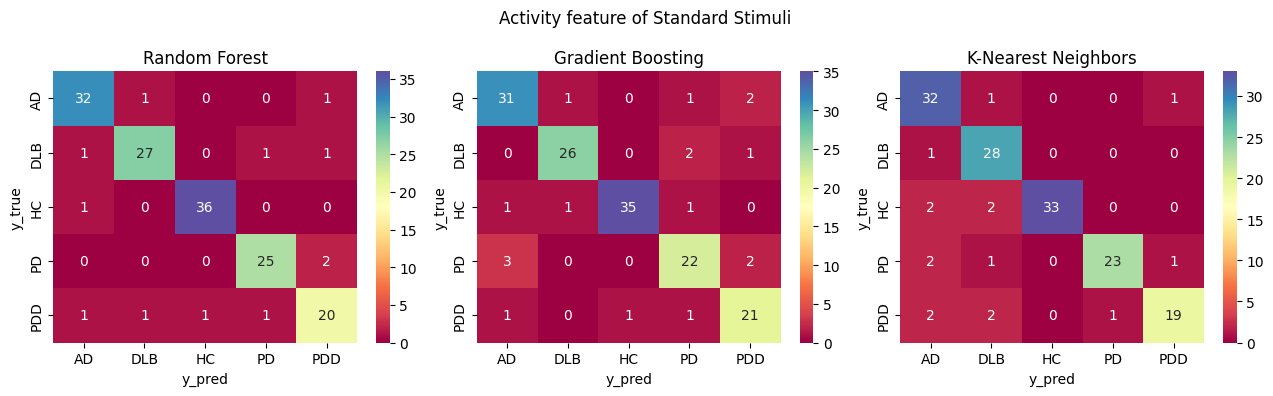

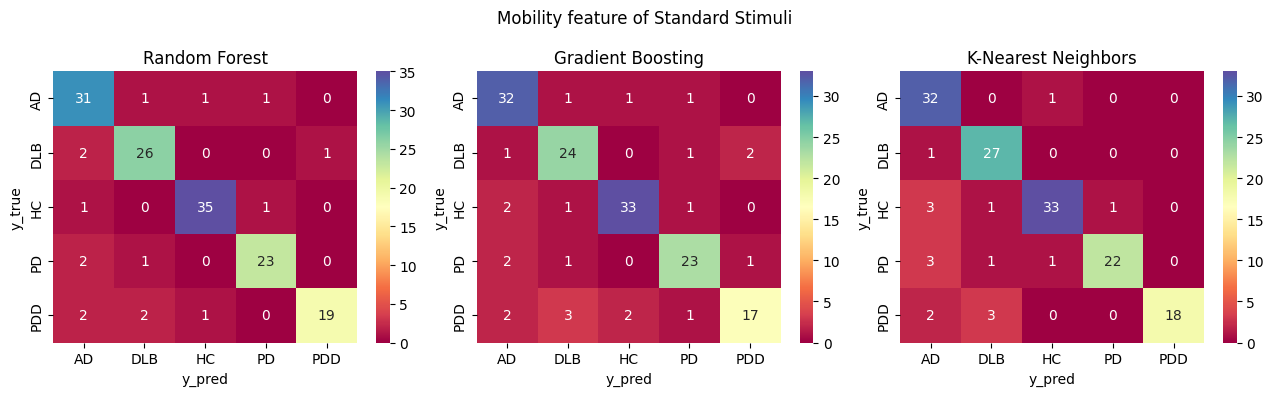

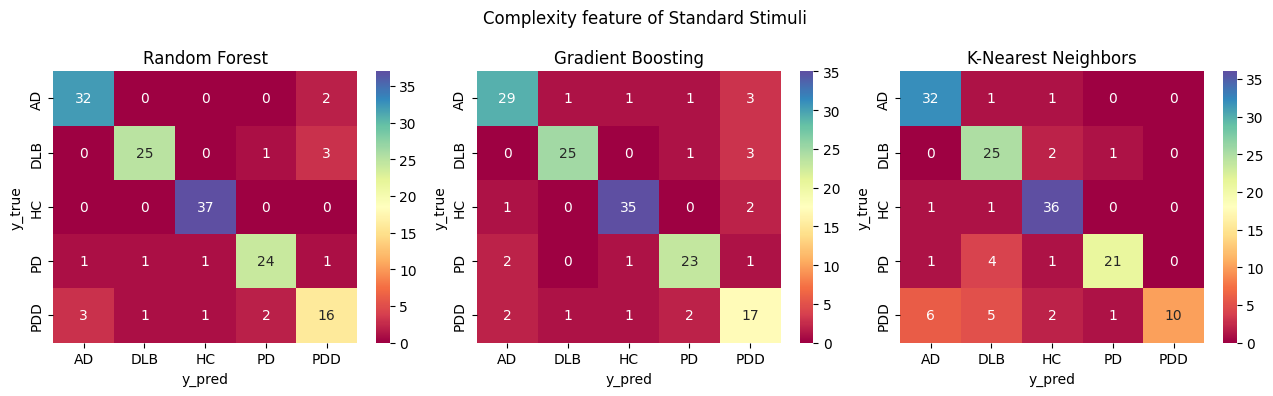

In [122]:
plot_cm.plot_CM_standard()

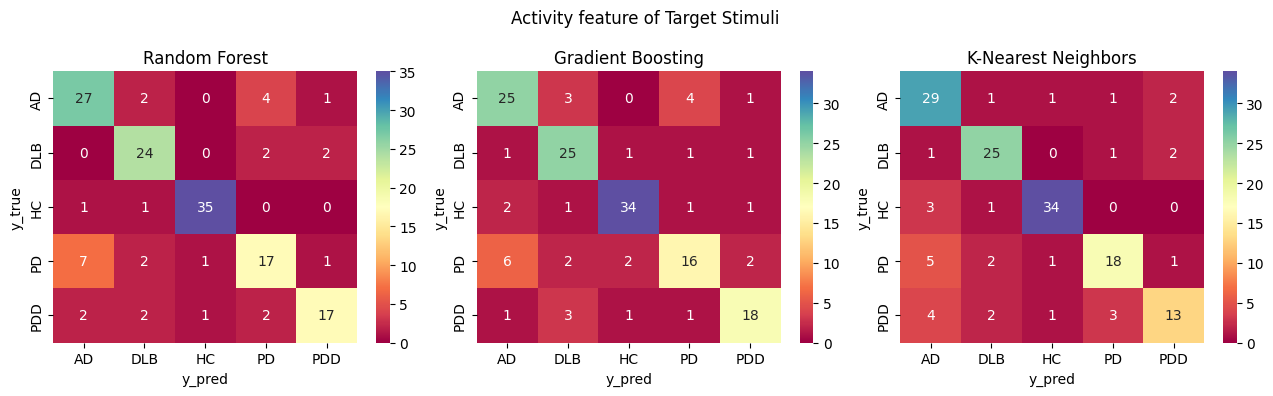

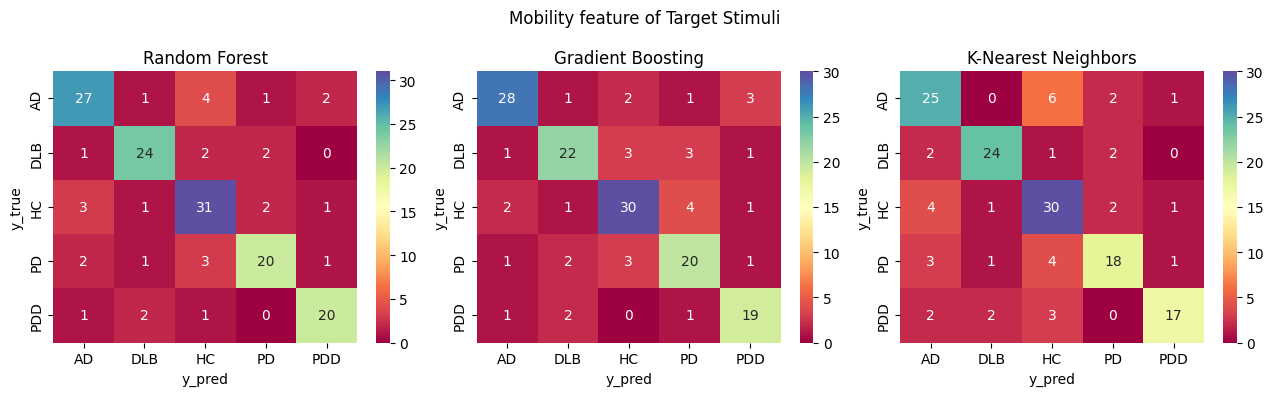

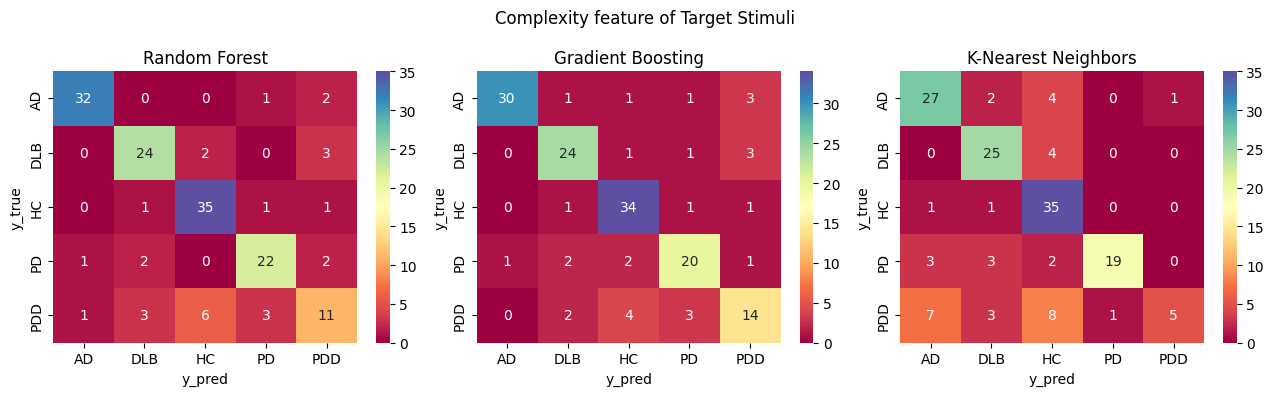

In [123]:
plot_cm.plot_CM_target()

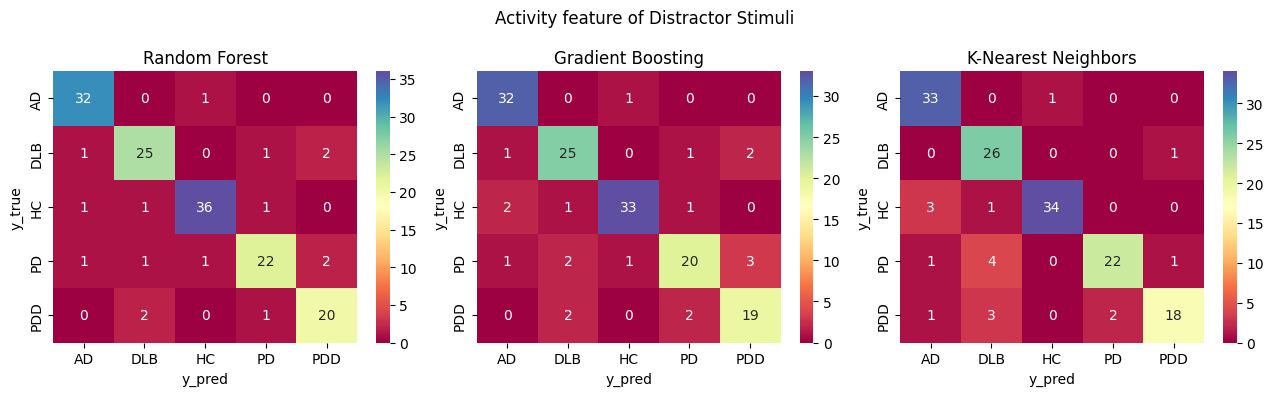

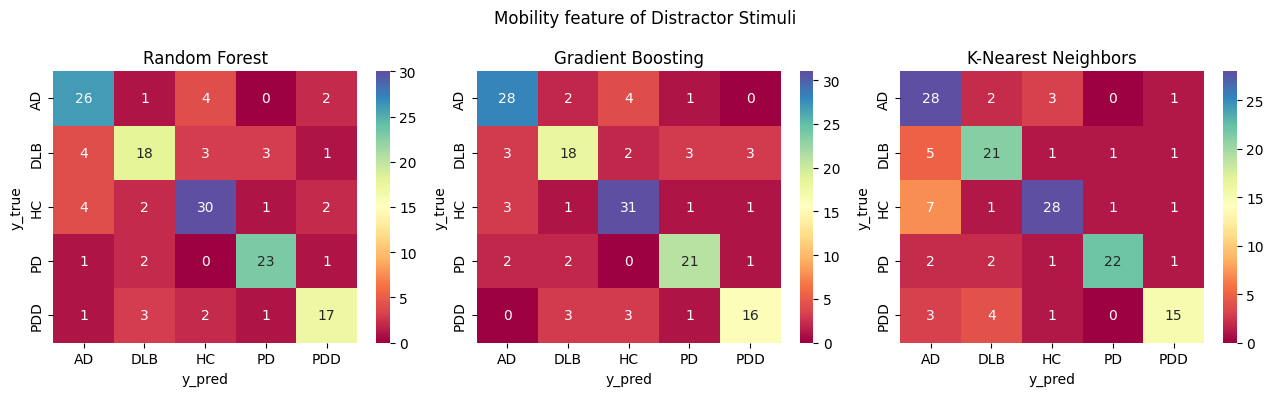

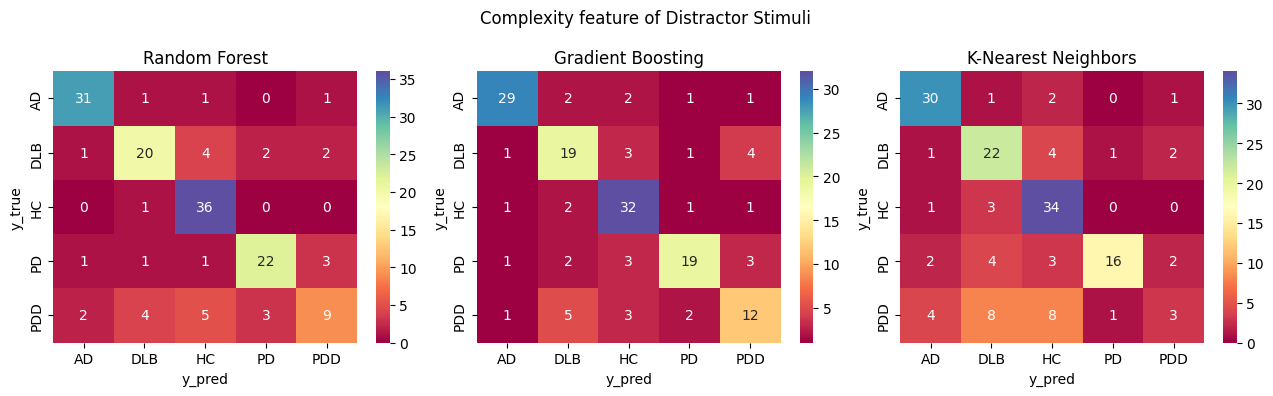

In [124]:
plot_cm.plot_CM_distractor()

# Classification results for EEGNet

In [ ]:
CLF_S = EEGNet(DLB_Standard, AD_Standard, PDD_Standard, PD_Standard, HC_Standard )

In [126]:
CLF_T = EEGNet(DLB_Target , AD_Target, PDD_Target, PD_Target, HC_Target )

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_model.h5

In [36]:
CLF_D = EEGNet(DLB_Distractor , AD_Distractor, PDD_Distractor, PD_Distractor, HC_Distractor )

Epoch 1/100
39/39 [==============================] - ETA: 0s - loss: 1.6090 - accuracy: 0.2348
Epoch 1: val_accuracy improved from -inf to 0.31026, saving model to best_model.h5
39/39 [==============================] - 6s 119ms/step - loss: 1.6090 - accuracy: 0.2348 - val_loss: 1.6034 - val_accuracy: 0.3103
Epoch 2/100
39/39 [==============================] - ETA: 0s - loss: 1.5819 - accuracy: 0.3044
Epoch 2: val_accuracy did not improve from 0.31026
39/39 [==============================] - 5s 126ms/step - loss: 1.5819 - accuracy: 0.3044 - val_loss: 1.5966 - val_accuracy: 0.3031
Epoch 3/100
39/39 [==============================] - ETA: 0s - loss: 1.5638 - accuracy: 0.3245
Epoch 3: val_accuracy did not improve from 0.31026
39/39 [==============================] - 5s 116ms/step - loss: 1.5638 - accuracy: 0.3245 - val_loss: 1.5893 - val_accuracy: 0.3031
Epoch 4/100
39/39 [==============================] - ETA: 0s - loss: 1.5472 - accuracy: 0.3374
Epoch 4: val_accuracy did not improve from

Epoch 12/100
39/39 [==============================] - ETA: 0s - loss: 1.3842 - accuracy: 0.4025
Epoch 12: val_accuracy did not improve from 0.37261
39/39 [==============================] - 5s 132ms/step - loss: 1.3842 - accuracy: 0.4025 - val_loss: 1.4964 - val_accuracy: 0.3662
Epoch 13/100
39/39 [==============================] - ETA: 0s - loss: 1.3864 - accuracy: 0.4063
Epoch 13: val_accuracy did not improve from 0.37261
39/39 [==============================] - 4s 106ms/step - loss: 1.3864 - accuracy: 0.4063 - val_loss: 1.4992 - val_accuracy: 0.3646
Epoch 14/100
39/39 [==============================] - ETA: 0s - loss: 1.3728 - accuracy: 0.4118
Epoch 14: val_accuracy did not improve from 0.37261
39/39 [==============================] - 4s 114ms/step - loss: 1.3728 - accuracy: 0.4118 - val_loss: 1.4947 - val_accuracy: 0.3686
Epoch 15/100
39/39 [==============================] - ETA: 0s - loss: 1.3648 - accuracy: 0.4225
Epoch 15: val_accuracy did not improve from 0.37261
39/39 [========

Epoch 7/100
39/39 [==============================] - ETA: 0s - loss: 1.4767 - accuracy: 0.3605
Epoch 7: val_accuracy improved from 0.31235 to 0.31394, saving model to best_model.h5
39/39 [==============================] - 5s 119ms/step - loss: 1.4767 - accuracy: 0.3605 - val_loss: 1.4944 - val_accuracy: 0.3139
Epoch 8/100
39/39 [==============================] - ETA: 0s - loss: 1.4570 - accuracy: 0.3645
Epoch 8: val_accuracy improved from 0.31394 to 0.32749, saving model to best_model.h5
39/39 [==============================] - 5s 117ms/step - loss: 1.4570 - accuracy: 0.3645 - val_loss: 1.4734 - val_accuracy: 0.3275
Epoch 9/100
39/39 [==============================] - ETA: 0s - loss: 1.4486 - accuracy: 0.3752
Epoch 9: val_accuracy improved from 0.32749 to 0.33307, saving model to best_model.h5
39/39 [==============================] - 4s 116ms/step - loss: 1.4486 - accuracy: 0.3752 - val_loss: 1.4649 - val_accuracy: 0.3331
Epoch 10/100
39/39 [==============================] - ETA: 0s - 

Epoch 16/100
39/39 [==============================] - ETA: 0s - loss: 1.3965 - accuracy: 0.4124
Epoch 16: val_accuracy did not improve from 0.42743
39/39 [==============================] - 4s 115ms/step - loss: 1.3965 - accuracy: 0.4124 - val_loss: 1.2857 - val_accuracy: 0.4242
Epoch 17/100
39/39 [==============================] - ETA: 0s - loss: 1.4008 - accuracy: 0.3981
Epoch 17: val_accuracy did not improve from 0.42743
39/39 [==============================] - 4s 108ms/step - loss: 1.4008 - accuracy: 0.3981 - val_loss: 1.2945 - val_accuracy: 0.4242
Epoch 18/100
39/39 [==============================] - ETA: 0s - loss: 1.3885 - accuracy: 0.4056
Epoch 18: val_accuracy improved from 0.42743 to 0.43545, saving model to best_model.h5
39/39 [==============================] - 4s 106ms/step - loss: 1.3885 - accuracy: 0.4056 - val_loss: 1.2823 - val_accuracy: 0.4354
Epoch 19/100
39/39 [==============================] - ETA: 0s - loss: 1.3853 - accuracy: 0.4050
Epoch 19: val_accuracy did not i

Epoch 44/100
39/39 [==============================] - ETA: 0s - loss: 1.3356 - accuracy: 0.4430
Epoch 44: val_accuracy did not improve from 0.47314
39/39 [==============================] - 4s 110ms/step - loss: 1.3356 - accuracy: 0.4430 - val_loss: 1.2315 - val_accuracy: 0.4643
Epoch 45/100
39/39 [==============================] - ETA: 0s - loss: 1.3305 - accuracy: 0.4432
Epoch 45: val_accuracy did not improve from 0.47314
39/39 [==============================] - 5s 121ms/step - loss: 1.3305 - accuracy: 0.4432 - val_loss: 1.2257 - val_accuracy: 0.4683
Epoch 46/100
39/39 [==============================] - ETA: 0s - loss: 1.3365 - accuracy: 0.4438
Epoch 46: val_accuracy did not improve from 0.47314
39/39 [==============================] - 4s 106ms/step - loss: 1.3365 - accuracy: 0.4438 - val_loss: 1.2280 - val_accuracy: 0.4643
Epoch 47/100
39/39 [==============================] - ETA: 0s - loss: 1.3257 - accuracy: 0.4471
Epoch 47: val_accuracy did not improve from 0.47314
39/39 [========

39/39 [==============================] - 0s 8ms/step - loss: 1.1150 - accuracy: 0.5172


In [37]:
CLF_S_DLB_HC = EEGNet(DLB_Standard, None,None, None, HC_Standard )

Epoch 1/100
68/68 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.5353
Epoch 1: val_accuracy improved from -inf to 0.56375, saving model to best_model.h5
68/68 [==============================] - 8s 101ms/step - loss: 0.6887 - accuracy: 0.5353 - val_loss: 0.6893 - val_accuracy: 0.5638
Epoch 2/100
68/68 [==============================] - ETA: 0s - loss: 0.6654 - accuracy: 0.5964
Epoch 2: val_accuracy improved from 0.56375 to 0.65292, saving model to best_model.h5
68/68 [==============================] - 7s 108ms/step - loss: 0.6654 - accuracy: 0.5964 - val_loss: 0.6729 - val_accuracy: 0.6529
Epoch 3/100
68/68 [==============================] - ETA: 0s - loss: 0.6173 - accuracy: 0.6875
Epoch 3: val_accuracy improved from 0.65292 to 0.70583, saving model to best_model.h5
68/68 [==============================] - 7s 102ms/step - loss: 0.6173 - accuracy: 0.6875 - val_loss: 0.6330 - val_accuracy: 0.7058
Epoch 4/100
68/68 [==============================] - ETA: 0s - loss

71/71 [==============================] - 8s 105ms/step - loss: 0.6916 - accuracy: 0.5336 - val_loss: 0.6861 - val_accuracy: 0.5976
Epoch 2/100
70/71 [============================>.] - ETA: 0s - loss: 0.6680 - accuracy: 0.6104
Epoch 2: val_accuracy improved from 0.59762 to 0.66286, saving model to best_model.h5
71/71 [==============================] - 7s 105ms/step - loss: 0.6678 - accuracy: 0.6108 - val_loss: 0.6608 - val_accuracy: 0.6629
Epoch 3/100
70/71 [============================>.] - ETA: 0s - loss: 0.6087 - accuracy: 0.6911
Epoch 3: val_accuracy improved from 0.66286 to 0.79095, saving model to best_model.h5
71/71 [==============================] - 8s 112ms/step - loss: 0.6090 - accuracy: 0.6904 - val_loss: 0.5465 - val_accuracy: 0.7910
Epoch 4/100
70/71 [============================>.] - ETA: 0s - loss: 0.5492 - accuracy: 0.7363
Epoch 4: val_accuracy improved from 0.79095 to 0.81476, saving model to best_model.h5
71/71 [==============================] - 8s 117ms/step - loss: 0

71/71 [==============================] - 9s 131ms/step - loss: 0.4672 - accuracy: 0.7870 - val_loss: 0.6749 - val_accuracy: 0.6619
Epoch 6/100
71/71 [==============================] - ETA: 0s - loss: 0.4406 - accuracy: 0.8080
Epoch 6: val_accuracy improved from 0.66190 to 0.66857, saving model to best_model.h5
71/71 [==============================] - 8s 113ms/step - loss: 0.4406 - accuracy: 0.8080 - val_loss: 0.6729 - val_accuracy: 0.6686
Epoch 7/100
70/71 [============================>.] - ETA: 0s - loss: 0.4214 - accuracy: 0.8165
Epoch 7: val_accuracy improved from 0.66857 to 0.67286, saving model to best_model.h5
71/71 [==============================] - 8s 106ms/step - loss: 0.4211 - accuracy: 0.8168 - val_loss: 0.6871 - val_accuracy: 0.6729
Epoch 8/100
71/71 [==============================] - ETA: 0s - loss: 0.4029 - accuracy: 0.8286
Epoch 8: val_accuracy did not improve from 0.67286
71/71 [==============================] - 8s 106ms/step - loss: 0.4029 - accuracy: 0.8286 - val_loss

In [38]:
CLF_S_PD_HC = EEGNet(None, None,None, PD_Standard, HC_Standard )

Epoch 1/100
66/66 [==============================] - ETA: 0s - loss: 0.6920 - accuracy: 0.5392
Epoch 1: val_accuracy improved from -inf to 0.49917, saving model to best_model.h5
66/66 [==============================] - 8s 106ms/step - loss: 0.6920 - accuracy: 0.5392 - val_loss: 0.6939 - val_accuracy: 0.4992
Epoch 2/100
66/66 [==============================] - ETA: 0s - loss: 0.6746 - accuracy: 0.5942
Epoch 2: val_accuracy improved from 0.49917 to 0.50417, saving model to best_model.h5
66/66 [==============================] - 9s 130ms/step - loss: 0.6746 - accuracy: 0.5942 - val_loss: 0.6944 - val_accuracy: 0.5042
Epoch 3/100
66/66 [==============================] - ETA: 0s - loss: 0.6541 - accuracy: 0.6458
Epoch 3: val_accuracy improved from 0.50417 to 0.61083, saving model to best_model.h5
66/66 [==============================] - 8s 128ms/step - loss: 0.6541 - accuracy: 0.6458 - val_loss: 0.6705 - val_accuracy: 0.6108
Epoch 4/100
66/66 [==============================] - ETA: 0s - loss

Epoch 29/100
66/66 [==============================] - ETA: 0s - loss: 0.2913 - accuracy: 0.8800
Epoch 29: val_accuracy did not improve from 0.84625
75/75 [==============================] - 1s 9ms/step - loss: 0.3714 - accuracy: 0.8346
Epoch 1/100
68/68 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.6070
Epoch 1: val_accuracy improved from -inf to 0.57238, saving model to best_model.h5
68/68 [==============================] - 9s 109ms/step - loss: 0.6718 - accuracy: 0.6070 - val_loss: 0.6795 - val_accuracy: 0.5724
Epoch 2/100
68/68 [==============================] - ETA: 0s - loss: 0.5938 - accuracy: 0.7295
Epoch 2: val_accuracy improved from 0.57238 to 0.58714, saving model to best_model.h5
68/68 [==============================] - 7s 103ms/step - loss: 0.5938 - accuracy: 0.7295 - val_loss: 0.6336 - val_accuracy: 0.5871
Epoch 3/100
68/68 [==============================] - ETA: 0s - loss: 0.5166 - accuracy: 0.7883
Epoch 3: val_accuracy improved from 0.58714 to 0.

Epoch 10/100
68/68 [==============================] - ETA: 0s - loss: 0.4510 - accuracy: 0.8051
Epoch 10: val_accuracy improved from 0.87238 to 0.87286, saving model to best_model.h5
68/68 [==============================] - 10s 143ms/step - loss: 0.4510 - accuracy: 0.8051 - val_loss: 0.3744 - val_accuracy: 0.8729
Epoch 11/100
68/68 [==============================] - ETA: 0s - loss: 0.4485 - accuracy: 0.8052
Epoch 11: val_accuracy did not improve from 0.87286
68/68 [==============================] - 9s 130ms/step - loss: 0.4485 - accuracy: 0.8052 - val_loss: 0.3736 - val_accuracy: 0.8714
Epoch 12/100
68/68 [==============================] - ETA: 0s - loss: 0.4464 - accuracy: 0.8069
Epoch 12: val_accuracy did not improve from 0.87286
68/68 [==============================] - 9s 137ms/step - loss: 0.4464 - accuracy: 0.8069 - val_loss: 0.3779 - val_accuracy: 0.8714
Epoch 13/100
68/68 [==============================] - ETA: 0s - loss: 0.4423 - accuracy: 0.8086
Epoch 13: val_accuracy did not 

Epoch 10/100
68/68 [==============================] - ETA: 0s - loss: 0.3932 - accuracy: 0.8369
Epoch 10: val_accuracy did not improve from 0.78333
68/68 [==============================] - 7s 110ms/step - loss: 0.3932 - accuracy: 0.8369 - val_loss: 0.5800 - val_accuracy: 0.7781
Epoch 11/100
68/68 [==============================] - ETA: 0s - loss: 0.3879 - accuracy: 0.8406
Epoch 11: val_accuracy did not improve from 0.78333
66/66 [==============================] - 1s 9ms/step - loss: 0.5860 - accuracy: 0.7729


## Results for raw epochs of Standard Stimuli using all 5-subject groups

In [39]:
clr_D_S = CLF_S.mean_std_results()
clr_D_S.to_latex('clr_D_S.tex')
clr_D_S

,AD,DLB,HC,PD,PDD
f1-score,0.359 ( 0.16),0.329 ( 0.06),0.571 ( 0.09),0.248 ( 0.16),0.376 ( 0.12)
precision,0.441 ( 0.18),0.398 ( 0.14),0.476 ( 0.09),0.389 ( 0.28),0.416 ( 0.21)
recall,0.313 ( 0.16),0.299 ( 0.06),0.736 ( 0.19),0.219 ( 0.16),0.414 ( 0.22)


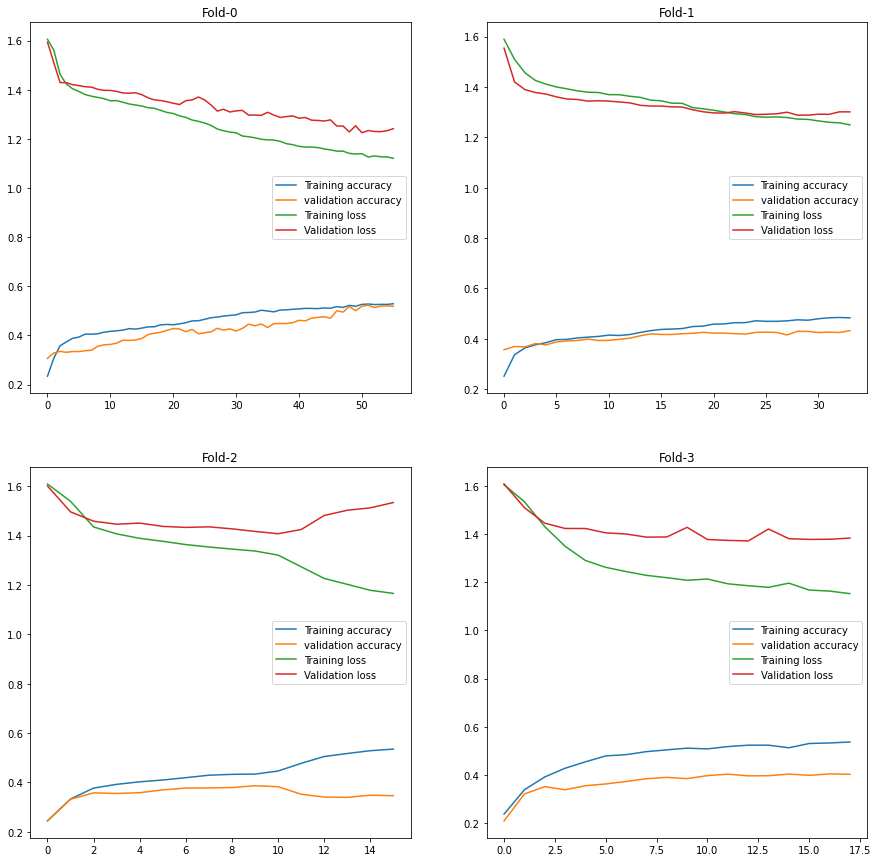

In [40]:
CLF_S.plots()

## Results for raw epochs of Target Stimuli using all 5-subject groups

In [41]:
clr_D_T = CLF_T.mean_std_results()
clr_D_T.to_latex('clr_D_T.tex')
clr_D_T

,AD,DLB,HC,PD,PDD
f1-score,0.228 ( 0.19),0.19 ( 0.11),0.597 ( 0.07),0.274 ( 0.08),0.43 ( 0.12)
precision,0.319 ( 0.27),0.316 ( 0.2),0.461 ( 0.06),0.366 ( 0.09),0.447 ( 0.12)
recall,0.189 ( 0.17),0.163 ( 0.13),0.847 ( 0.09),0.231 ( 0.09),0.506 ( 0.26)


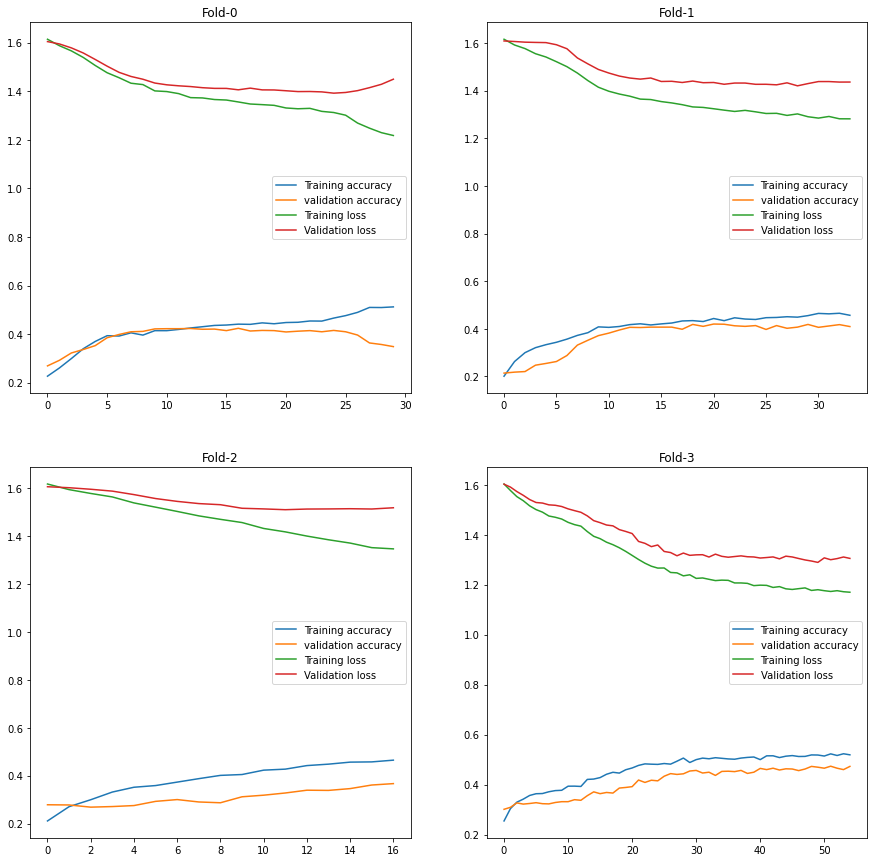

In [42]:
CLF_T.plots()

## Results for raw epochs of Distractor Stimuli using all 5-subject groups

In [43]:
clr_D_D = CLF_D.mean_std_results()
clr_D_D.to_latex('clr_D_D.tex')
clr_D_D

,AD,DLB,HC,PD,PDD
f1-score,0.224 ( 0.18),0.177 ( 0.13),0.552 ( 0.07),0.301 ( 0.1),0.332 ( 0.13)
precision,0.341 ( 0.23),0.287 ( 0.13),0.415 ( 0.05),0.399 ( 0.21),0.348 ( 0.17)
recall,0.171 ( 0.14),0.146 ( 0.11),0.839 ( 0.16),0.247 ( 0.06),0.35 ( 0.1)


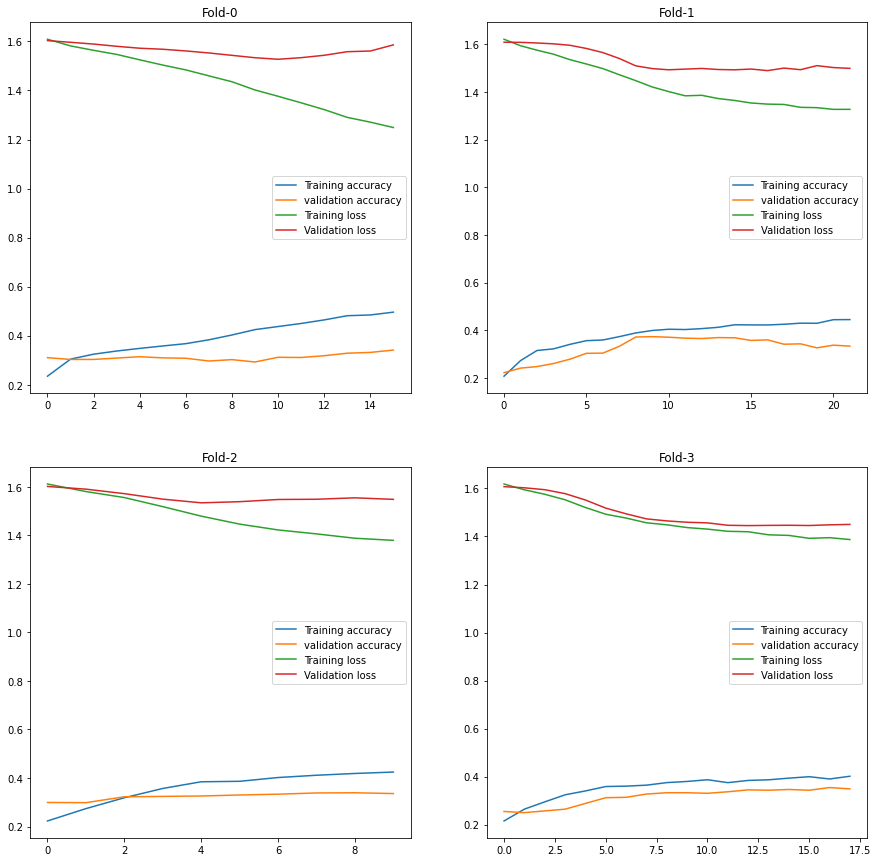

In [44]:
CLF_D.plots()

## Results for raw epochs of Standard Stimuli using DLB and HC subjects 

In [45]:
clr_S_DLB_HC = CLF_S_DLB_HC.mean_std_results()
clr_S_DLB_HC.to_latex('CLF_S_DLB_HC.tex')
clr_S_DLB_HC

,class1,HC,Accuracy,Macro avg,Weiwghted avg
f1-score,0.635 ( 0.13),0.794 ( 0.04),0.744 ( 0.05),0.715 ( 0.07),0.729 ( 0.06)
precision,0.789 ( 0.09),0.729 ( 0.05),0.744 ( 0.05),0.759 ( 0.06),0.754 ( 0.05)
recall,0.548 ( 0.17),0.879 ( 0.09),0.744 ( 0.05),0.714 ( 0.07),0.744 ( 0.05)


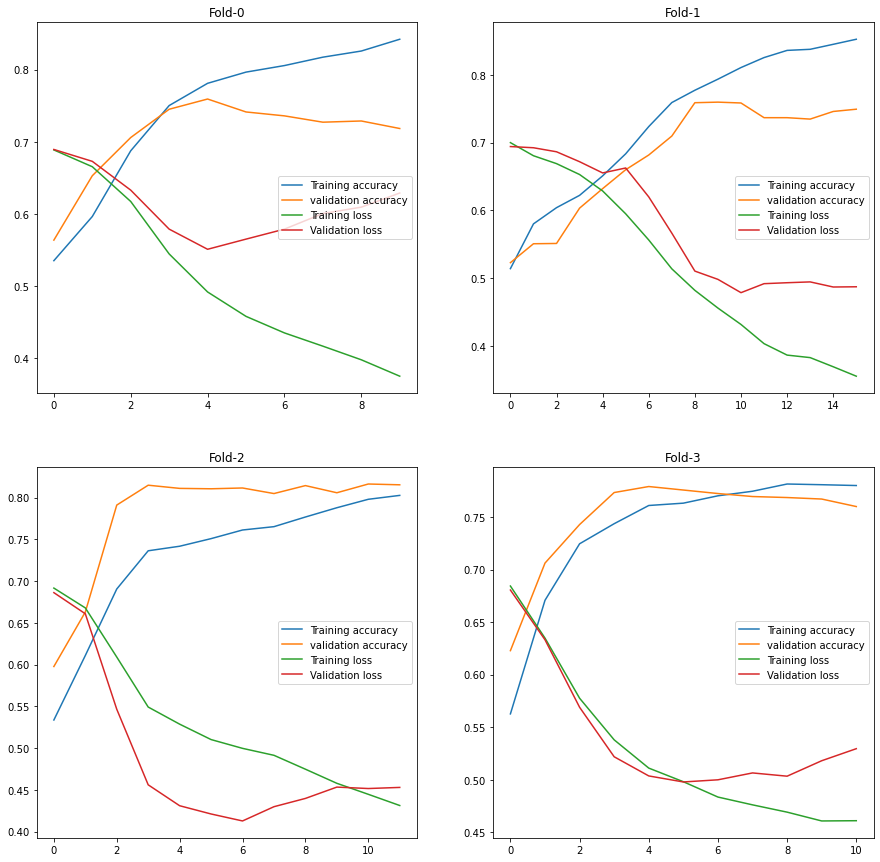

In [46]:
 CLF_S_DLB_HC.plots()

## Results for raw epochs of Standard Stimuli using PD and HC subjects 

In [47]:
clr_S_PD_HC = CLF_S_PD_HC.mean_std_results()
clr_S_PD_HC

,class1,HC,Accuracy,Macro avg,Weiwghted avg
f1-score,0.709 ( 0.09),0.847 ( 0.04),0.803 ( 0.05),0.778 ( 0.06),0.792 ( 0.06)
precision,0.9 ( 0.08),0.772 ( 0.06),0.803 ( 0.05),0.836 ( 0.04),0.827 ( 0.04)
recall,0.6 ( 0.13),0.943 ( 0.05),0.803 ( 0.05),0.771 ( 0.05),0.803 ( 0.05)


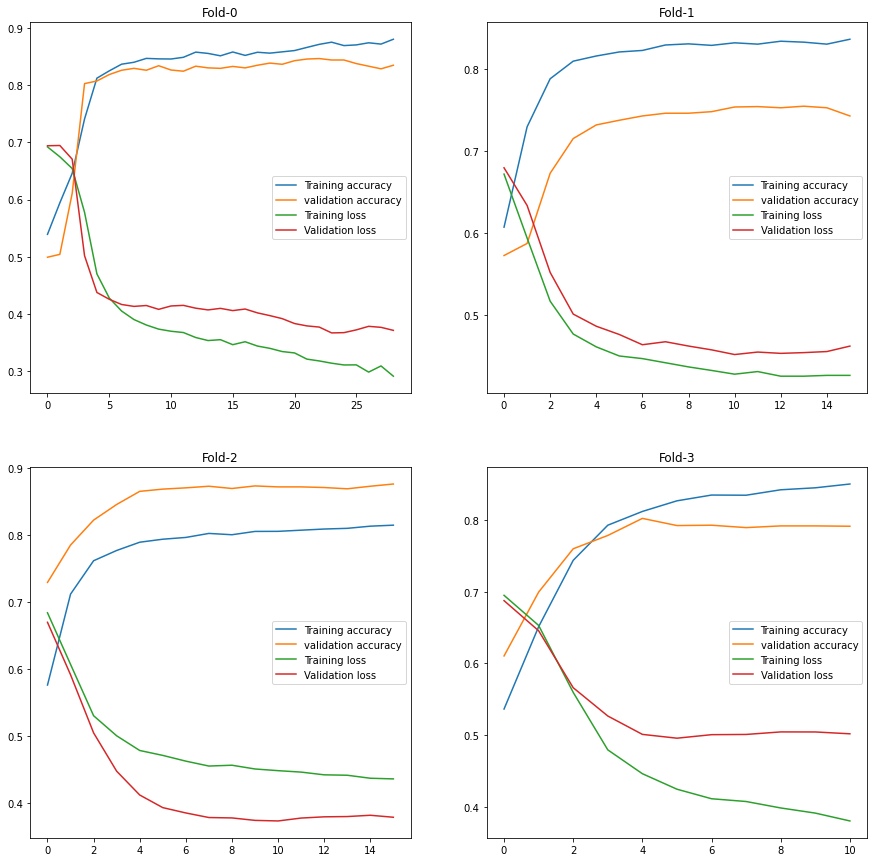

In [48]:
 CLF_S_PD_HC.plots()

## Preprocessing visualization

In [127]:
def preProcessingVisualization(raw_patient):
    raw =  mne.io.read_raw_eeglab(raw_patient)
    p1 = raw.plot()
    raw.filter(l_freq = 1.0, h_freq = None)
    raw.set_eeg_reference('average')
    new_ch_names = ['V-EOG',
                 'H-EOG',
                 'P3',
                 'Pz',
                 'P4',
                 'T7',
                 'T8',
                 'O1',
                 'Fp1',
                 'Fp2',
                 'F3',
                 'Fz',
                 'F4',
                 'C3',
                 'Cz',
                 'C4']

    old_ch_names = raw.ch_names
    if new_ch_names == old_ch_names:
        raw = raw
    else:
        mapping = {k: v for k, v in zip(old_ch_names, new_ch_names)}
        raw.rename_channels(mapping)

    #raw = raw.drop_channels(['T7', 'T8', 'O1', 'Fp1', 'Fp2'], on_missing = 'ignore')

    raw = raw.set_channel_types({'V-EOG': 'eog', 'H-EOG': 'eog'}, verbose=None)

    # Load the montage
    montage = mne.channels.make_standard_montage('standard_1020' )

    # Set the montage for the EEG data
    raw = raw.set_montage(montage)


    ## reapairing artifact with regression
    # Perform regression using the EOG channels/sensors as independent variable and the EEG
    # channels/sensors as dependent variables
    model_plain = EOGRegression(picks='eeg', exclude='bads', picks_artifact='eog', proj=True).fit(raw)
    raw_clean = model_plain.apply(raw)
    p2 = raw_clean.plot()
    
    
    # determine the number of independent components, choose method algorithm
    ica = ICA(n_components=None, method='picard',fit_params=dict(extended=True),
                          random_state=21, max_iter = 10000 )


    # Apply ICA 
    ica = ica.fit(raw_clean)
    bad_idxV, scoresV = ica.find_bads_eog(raw_clean, ch_name='V-EOG', threshold=2, start=None,
                                stop=None, l_freq=1, h_freq=60,reject_by_annotation=True, 
                                        measure='zscore', verbose=None)

    bad_idxH, scoresH = ica.find_bads_eog(raw_clean, ch_name='H-EOG', threshold=2, start=None,
                                stop=None, l_freq=1, h_freq=60,reject_by_annotation=True, 
                                        measure='zscore', verbose=None)
    #bad_idx, scores = ica.find_bads_eog(raw, 'V-EOG', threshold = 1)
    exclude = bad_idxV + bad_idxH
    ica.exclude = exclude
    raw_ica_clean = ica.apply(raw_clean)
    #raw_ica_clean.set_eeg_reference('average')
    
    p3 = raw_ica_clean.plot()
    
    events = mne.events_from_annotations(raw_ica_clean)
    events = events[0]
    event_ids = {'standard/stimulus': 1, 'reaction_time/stimulus': 2,'distractor/stimulus': 3, 
                 'target/stimulus': 4}

    # epoch the data based on the onset of the events 
    tmin = -0.1
    tmax = 2.0
    epochs = mne.Epochs(raw_ica_clean, events, event_id = event_ids, tmin = tmin, tmax = tmax, 
                        preload = True, on_missing='ignore', baseline = None)

    # Drop epochs based on the reject criteria
    reject = dict(eeg=120e-6) 
    epochs = epochs.drop_bad(reject=reject)
    epochs = epochs.resample(sfreq=128)
    p4 = epochs.plot()
    
    
    return p1, p2, p3, p4


In [128]:
%%capture 
p1, p2, p3, p4 = preProcessingVisualization(HC[0])

## Different stages for  EEG signal during preprocessing. 

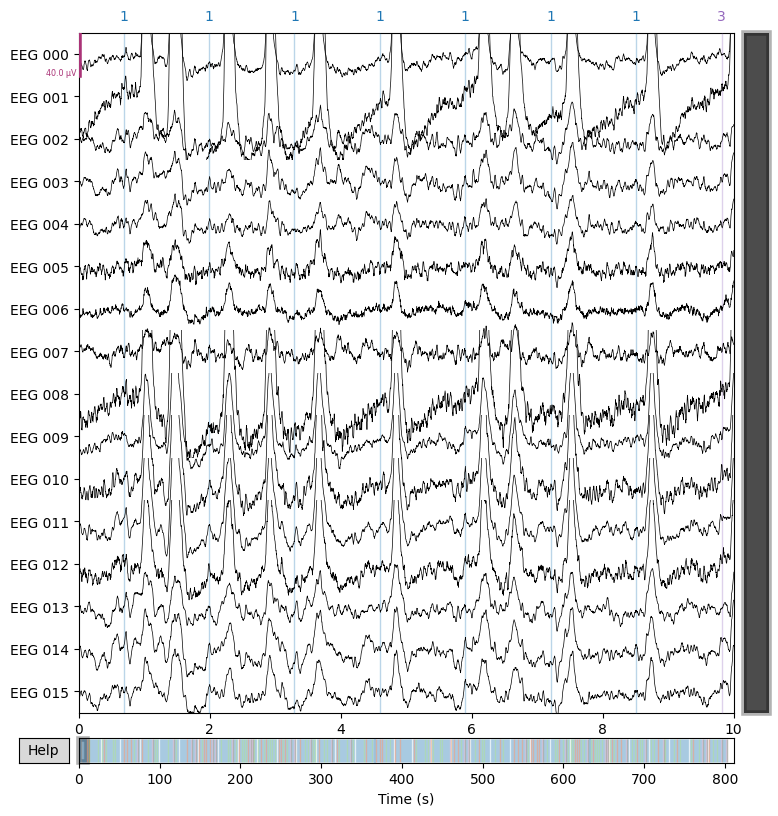

In [129]:
# Raw EEG signal
p1

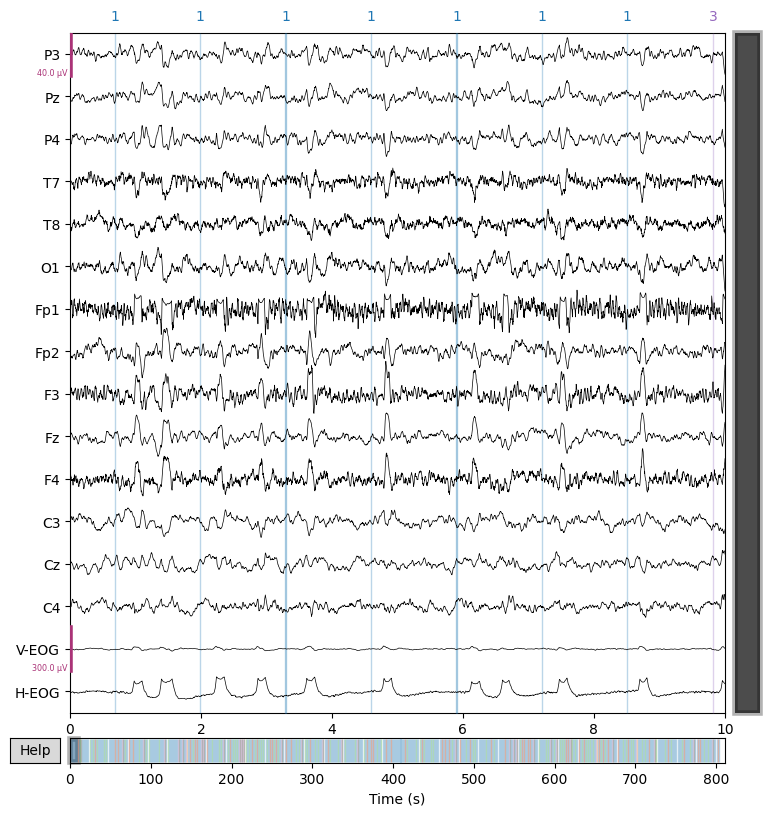

In [131]:
# EEG signal after filtering, re-referencing, and repairing with regression techniques.
p2

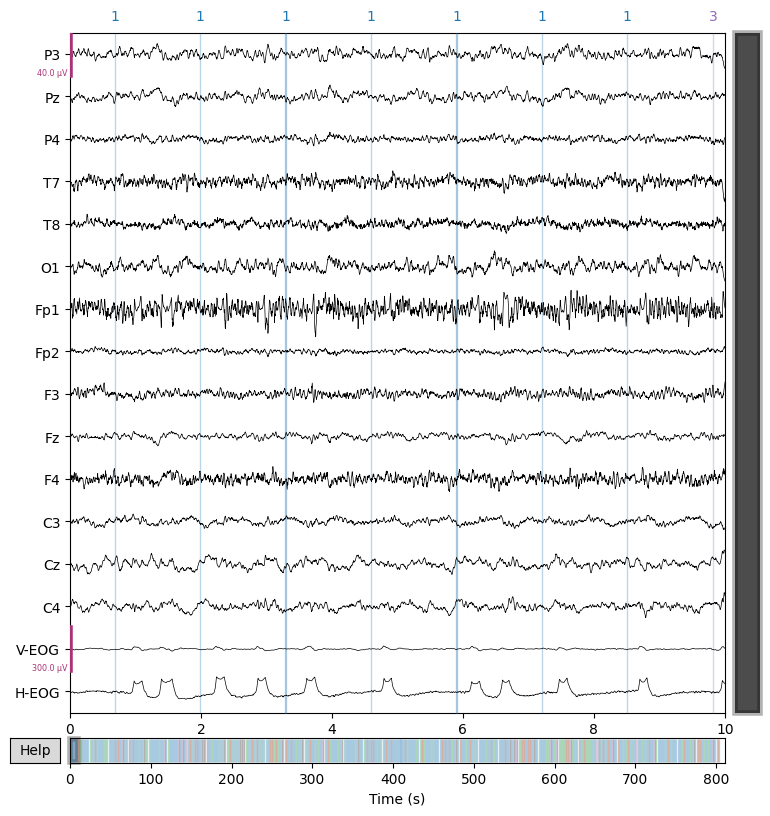

In [132]:
# EEG signal after stage 2 + further cleaning with ICA. 
p3

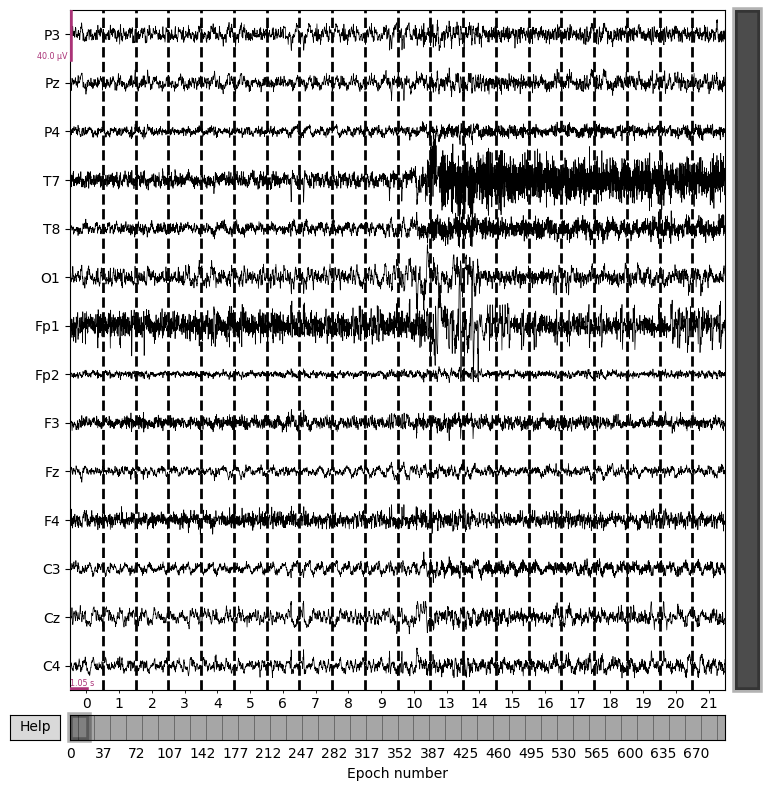

In [133]:
# Epoched EEG signal
p4